In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Install required packages and classes**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from wordcloud import WordCloud

In [ ]:
Kenyan_Tweets = pd.read_csv('/content/drive/My Drive/Final Data/Edited Data/Key Data /KenyanTweets.csv', engine ='python')
Kenyan_Tweets['number'] = 1
Nigerian_Tweets = pd.read_csv('/content/drive/My Drive/Final Data/Edited Data/Key Data /NigerianTweets.csv', engine ='python')
Nigerian_Tweets['number'] = 1
South_African_Tweets = pd.read_csv('/content/drive/My Drive/Final Data/Edited Data/Key Data /SouthAfricanTweets.csv', engine ='python')
South_African_Tweets['number'] = 1

In [ ]:
class Automation:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self):
        print('Automation in Action...!!!')

    def Clean_Tweets(self, df):
        # drop na in clean tweets column
        a = df[df['retweet_count'] == 'retweet_count' ].index
        df.drop(a , inplace=True)
        # dropduplicates and drop duplicates in clean tweets
        df = df.drop_duplicates().drop_duplicates(subset='clean_text')
        # convert int column appropriately
        df = df[df['polarity'] != 'polarity']
        # convert the created_at column to a datetime object
        df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
        df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d')
        df = df[df['created_at'] >= '2019-01-01' ]
        # convert int column appropriately
        df['polarity'] = pd.to_numeric(df['polarity'], errors='coerce')
        df['subjectivity'] = pd.to_numeric(df['subjectivity'], errors='coerce')
        df['retweet_count'] = pd.to_numeric(df['retweet_count'], errors='coerce')
        df['favorite_count'] = pd.to_numeric(df['favorite_count'], errors='coerce')
        return df

    def Time_Trend(self, df, city,x):
        ax = df.groupby('created_at')[['retweet_count', 'favorite_count', 'number']].sum().plot(figsize=(20,8))
        plt.title(f'Trend of likes and retweets for {city}', size=20)
        plt.axvline(x=x,color='gray',linestyle='--')
        plt.ylabel('Frequency', fontsize=14)
        plt.xlabel('Time', fontsize=14)
        plt.xticks(rotation=45)
        plt.show()
        
        
    def Draw_Wordcloud(self, tweets_series, description):
        # word cloud visualization
        allWords = ' '.join([twts for twts in tweets_series])
        wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
        plt.figure(figsize=(15, 12))
        plt.imshow(wordCloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(f'Most used words describing {description}', size=20)
        plt.show()
        

In [ ]:
Auto = Automation()

Automation in Action...!!!


## **Kenya**

In [ ]:
Kenyan_Tweets = Auto.Clean_Tweets(Kenyan_Tweets)
print(Kenyan_Tweets.shape)

(400213, 18)


### **Locusts**

In [ ]:
Locusts = Kenyan_Tweets[Kenyan_Tweets['original_text'].str.lower().str.contains('|'.join(['locust']))]
Locusts.shape

(676, 18)

In [ ]:
Kenyan_Locusts = pd.DataFrame(Locusts['original_author'].value_counts())

In [ ]:
#visualize this to bar chart Kenyan_Locusts


Resource on locusts by FAO
http://www.fao.org/emergencies/resources/photos/photo-detail/en/c/1258345/

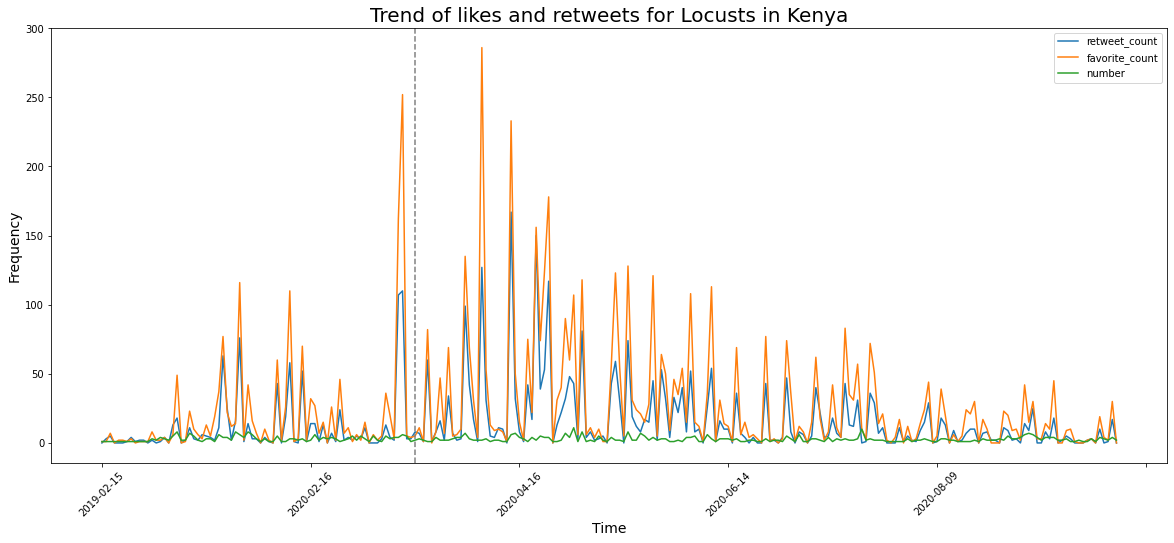

In [ ]:
Auto.Time_Trend(Locusts, 'Locusts in Kenya',75)

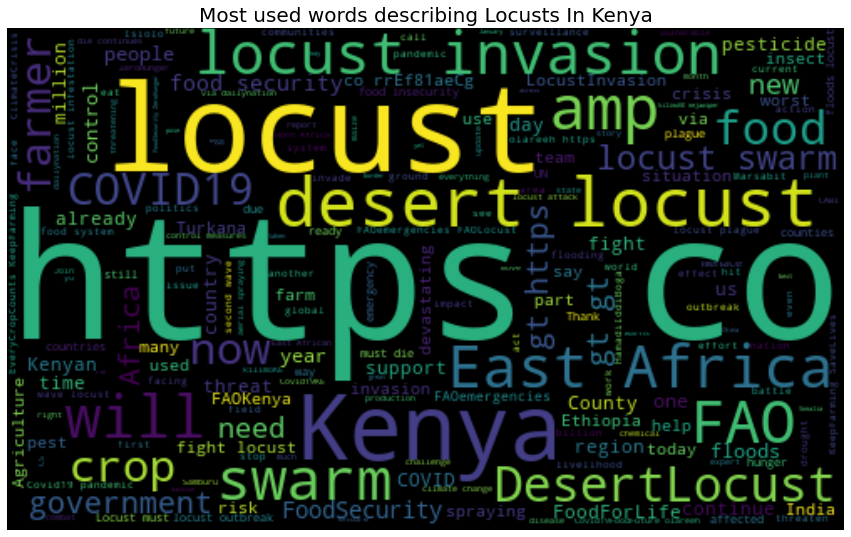

In [ ]:
Auto.Draw_Wordcloud(Locusts['original_text'], 'Locusts In Kenya')

In [ ]:
#remove locusts
Locusts_Tweets = Locusts.index
Kenyan_Tweets = Kenyan_Tweets.drop(Locusts_Tweets, axis=0)
print(Kenyan_Tweets.shape)

(399537, 18)


In [ ]:
# Filter Based on Food Keywords
Food_Keywords = ['food', 'foodstuffs', 'foodstuff', 'grocery','starvation', 'hungry', 'starving', 'hunger']
Kenyan_Food_Tweets = Kenyan_Tweets[Kenyan_Tweets['original_text'].str.lower().str.contains('|'.join(Food_Keywords))]
print(Kenyan_Food_Tweets.shape)

#Remove Adverisements
Advert_Keywords = ['promo', 'free', 'cheap']
Adverts_Kenyan_Food_Tweets = Kenyan_Food_Tweets[Kenyan_Food_Tweets['original_text'].str.lower().str.contains('|'.join(Advert_Keywords))]
print(Adverts_Kenyan_Food_Tweets.shape)

Advertising_Tweets = Adverts_Kenyan_Food_Tweets.index
Kenyan_Food_Tweets = Kenyan_Food_Tweets.drop(Advertising_Tweets, axis=0)
print(Kenyan_Food_Tweets.shape)

(14825, 18)
(475, 18)
(14350, 18)


### **Advertisements**

In [ ]:
Kenyan_Adverts = list(Adverts_Kenyan_Food_Tweets['original_author'])

In [ ]:
#visualize this to bar chart Kenyan_Adverts

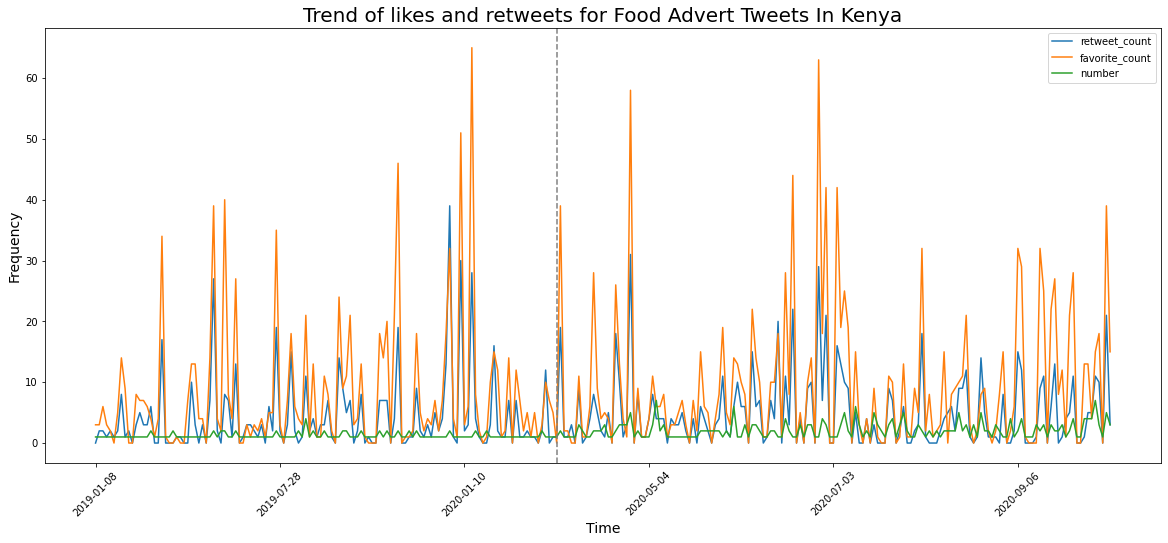

In [ ]:
Auto.Time_Trend(Adverts_Kenyan_Food_Tweets, 'Food Advert Tweets In Kenya',125)

In [ ]:
Hashtags_Kenyan_Food_Tweets = Adverts_Kenyan_Food_Tweets['hashtags']
Hashtag_List_Kenyan_Food_Tweets = []
for Hashtags in Hashtags_Kenyan_Food_Tweets:
    try:
        Hashtag = Hashtags.split(', ')
        Hashtag_List_Kenyan_Food_Tweets.extend(Hashtag)
    except AttributeError:
        continue

In [ ]:
#visualize Hashtag_List_Kenyan_Food_Tweets

In [ ]:
Mentions_Kenyan_Food_Tweets = Adverts_Kenyan_Food_Tweets['user_mentions']
Mention_List_Kenyan_Food_Tweets = []
for Mentions in Mentions_Kenyan_Food_Tweets:
    try:
        Mention = Mentions.split(', ')
        Mention_List_Kenyan_Food_Tweets.extend(Mention)
    except AttributeError:
        continue

In [ ]:
#visualize Mention_List_Kenyan_Food_Tweets

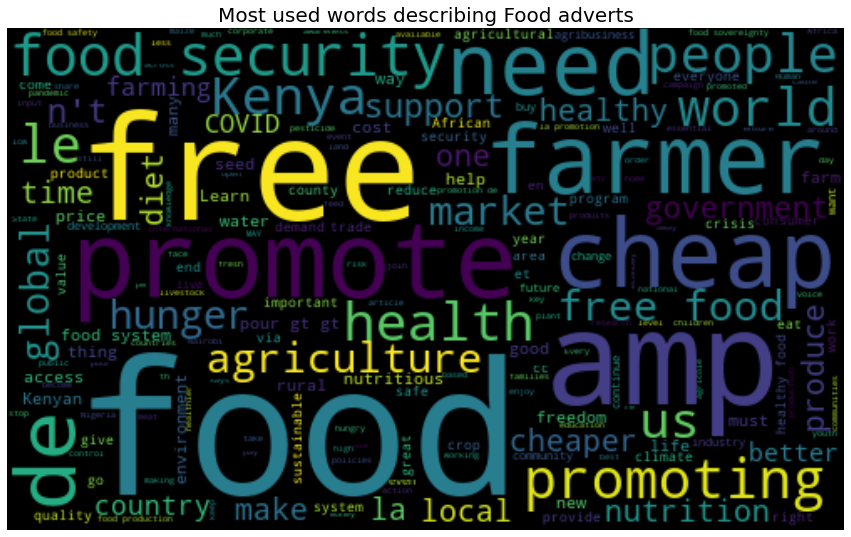

In [ ]:
Auto.Draw_Wordcloud(Adverts_Kenyan_Food_Tweets['clean_text'], 'Food adverts')

### **Kenyan Tweets about Food**

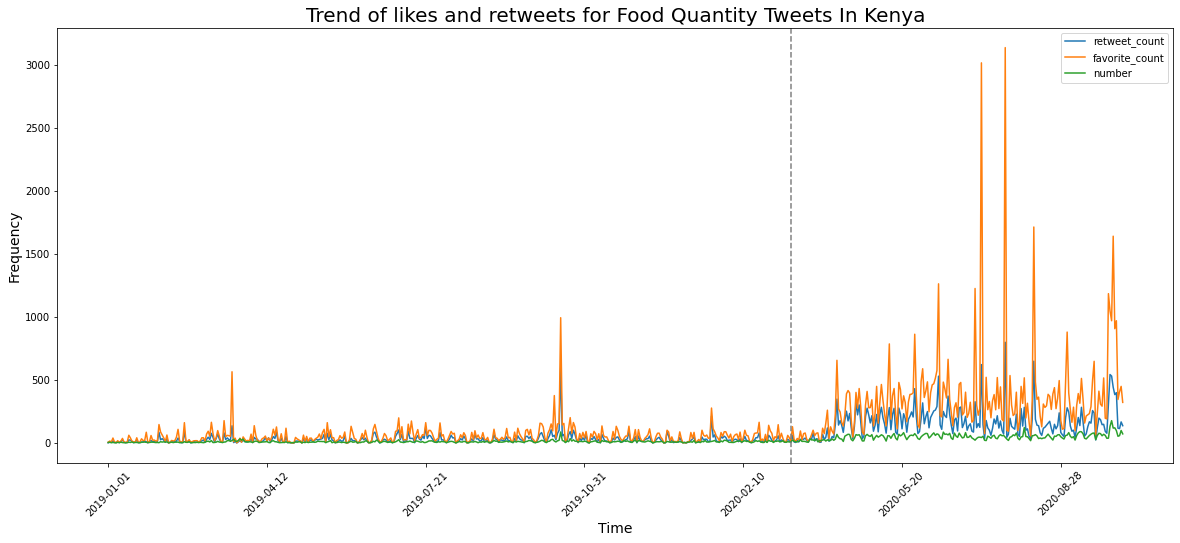

In [ ]:
Auto.Time_Trend(Kenyan_Food_Tweets, 'Food Quantity Tweets In Kenya',430)

In [ ]:
Hashtags_Kenyan_Food_Tweets = Kenyan_Food_Tweets['hashtags']
Hashtag_List_Kenyan_Food_Tweets = []
for Hashtags in Hashtags_Kenyan_Food_Tweets:
    try:
        Hashtag = Hashtags.split(', ')
        Hashtag_List_Kenyan_Food_Tweets.extend(Hashtag)
    except AttributeError:
        continue

In [ ]:
#visualize Hashtag_List_Kenyan_Food_Tweets

In [ ]:
Mentions_Kenyan_Food_Tweets = Kenyan_Food_Tweets['user_mentions']
Mention_List_Kenyan_Food_Tweets = []
for Mentions in Mentions_Kenyan_Food_Tweets:
    try:
        Mention = Mentions.split(', ')
        Mention_List_Kenyan_Food_Tweets.extend(Mention)
    except AttributeError:
        continue

In [ ]:
#visualize Mention_List_Kenyan_Food_Tweetso 

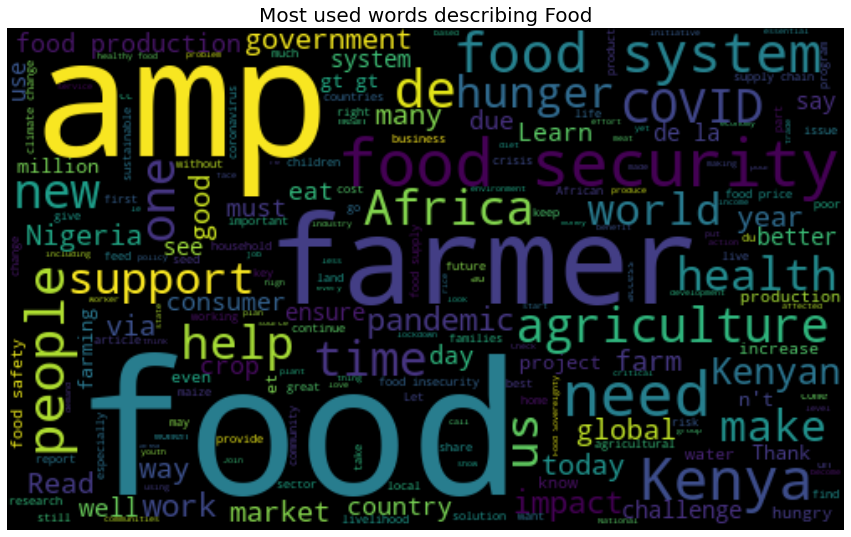

In [ ]:
Auto.Draw_Wordcloud(Kenyan_Food_Tweets['clean_text'], 'Food')

With COVID


In [ ]:
Covid_Keywords = ['covid', 'corona', 'pandemic','covid-19']
Covid_Kenyan_Food_Tweets = Kenyan_Food_Tweets[Kenyan_Food_Tweets['original_text'].str.lower().str.contains('|'.join(Covid_Keywords))]
print(Covid_Kenyan_Food_Tweets.shape)


(4212, 18)


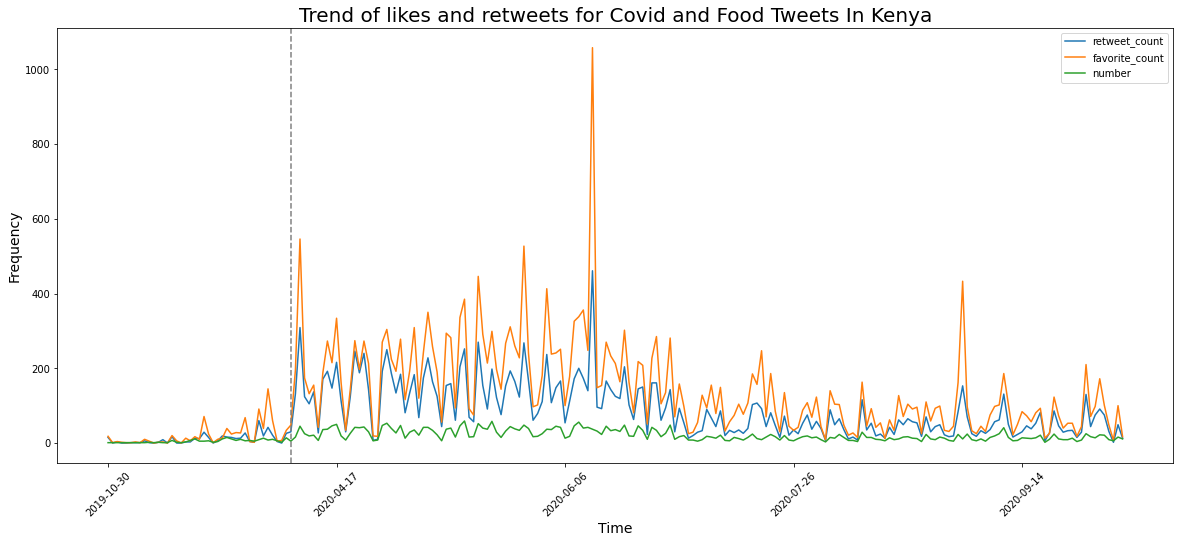

In [ ]:
Auto.Time_Trend(Covid_Kenyan_Food_Tweets, 'Covid and Food Tweets In Kenya',40)

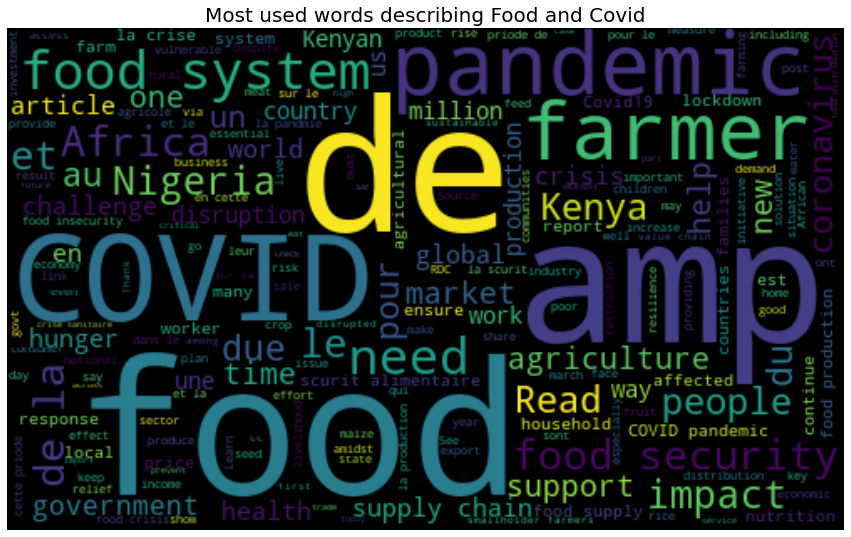

In [ ]:
Auto.Draw_Wordcloud(Covid_Kenyan_Food_Tweets['clean_text'], 'Food and Covid')

No COVID

In [ ]:
Covid_Tweets = Covid_Kenyan_Food_Tweets.index
No_Covid_Kenyan_Food_Tweets = Kenyan_Food_Tweets.drop(Covid_Tweets, axis=0)
print(No_Covid_Kenyan_Food_Tweets.shape)

(10138, 18)


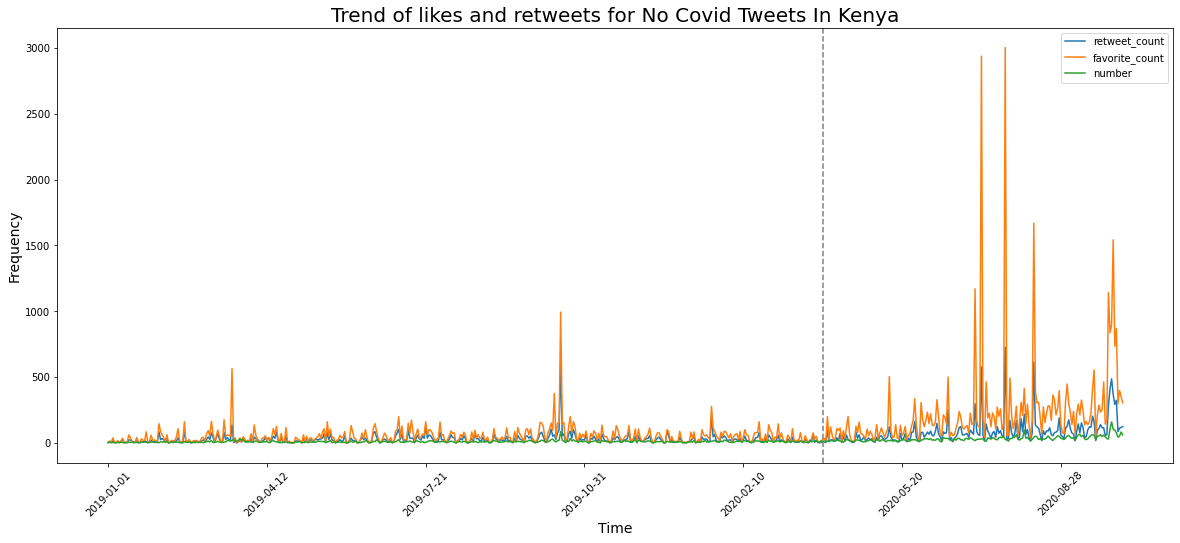

In [ ]:
Auto.Time_Trend(No_Covid_Kenyan_Food_Tweets, 'No Covid Tweets In Kenya',450)

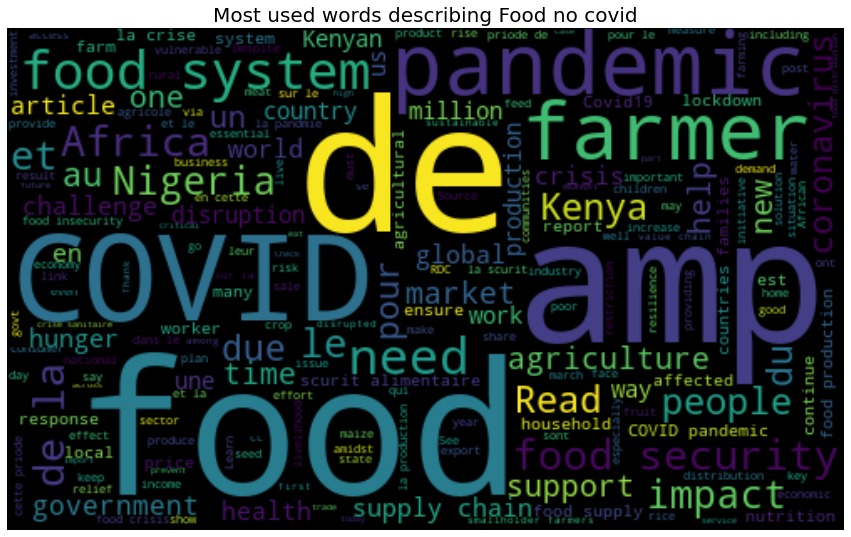

In [ ]:
Auto.Draw_Wordcloud(Covid_Kenyan_Food_Tweets['clean_text'], 'Food no covid')

## **Nigeria**


In [ ]:
Nigerian_Tweets = Auto.Clean_Tweets(Nigerian_Tweets)
print(Nigerian_Tweets.shape)

(891599, 18)


In [ ]:
# Filter Based on Food Keywords
Food_Keywords = ['food', 'foodstuffs', 'foodstuff', 'grocery','starvation', 'hungry', 'starving', 'hunger']
Nigerian_Food_Tweets = Nigerian_Tweets[Nigerian_Tweets['original_text'].str.lower().str.contains('|'.join(Food_Keywords))]
print(Nigerian_Food_Tweets.shape)

#Remove Adverisements
Advert_Keywords = ['promo', 'free', 'cheap']
Adverts_Nigerian_Food_Tweets = Nigerian_Food_Tweets[Nigerian_Food_Tweets['original_text'].str.lower().str.contains('|'.join(Advert_Keywords))]
print(Adverts_Nigerian_Food_Tweets.shape)

Advertising_Tweets = Adverts_Nigerian_Food_Tweets.index
Nigerian_Food_Tweets = Nigerian_Food_Tweets.drop(Advertising_Tweets, axis=0)
print(Nigerian_Food_Tweets.shape)

(16156, 18)
(576, 18)
(15580, 18)


### **Advertisements**

In [ ]:
Nigerian_Adverts = list(Adverts_Nigerian_Food_Tweets['original_author'])

In [ ]:
#visualize this to bar chart Nigerian_Adverts

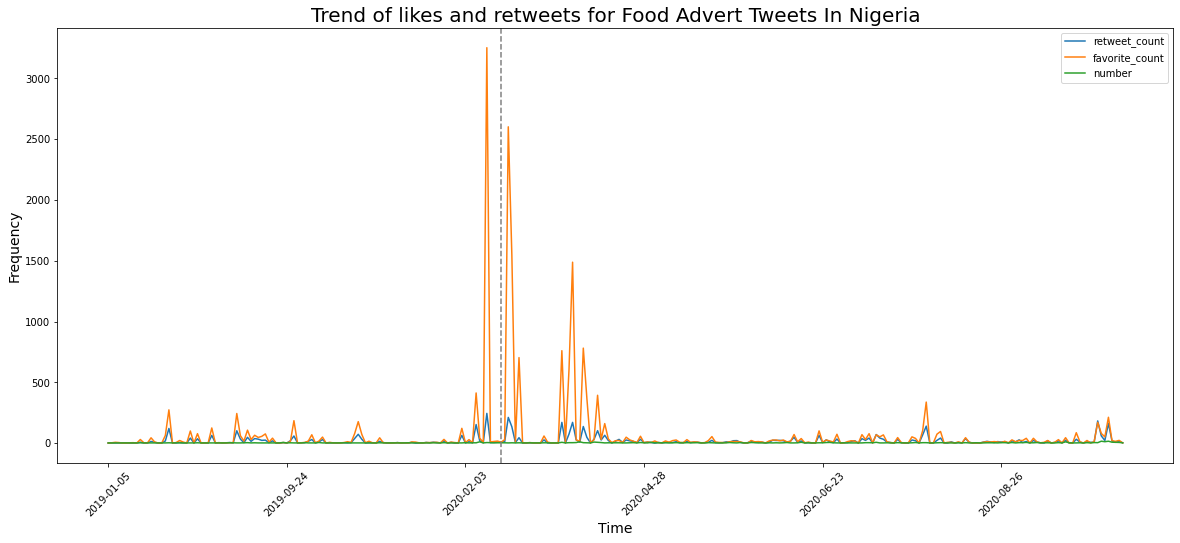

In [ ]:
Auto.Time_Trend(Adverts_Nigerian_Food_Tweets, 'Food Advert Tweets In Nigeria',110)

In [ ]:
Hashtags_Nigerian_Food_Tweets = Adverts_Nigerian_Food_Tweets['hashtags']
Hashtag_List_Nigerian_Food_Tweets = []
for Hashtags in Hashtags_Nigerian_Food_Tweets:
    try:
        Hashtag = Hashtags.split(', ')
        Hashtag_List_Nigerian_Food_Tweets.extend(Hashtag)
    except AttributeError:
        continue

In [ ]:
#visualize Hashtag_List_Nigerian_Food_Tweets

In [ ]:
Mentions_Nigerian_Food_Tweets = Adverts_Nigerian_Food_Tweets['user_mentions']
Mention_List_Nigerian_Food_Tweets = []
for Mentions in Mentions_Nigerian_Food_Tweets:
    try:
        Mention = Mentions.split(', ')
        Mention_List_Nigerian_Food_Tweets.extend(Mention)
    except AttributeError:
        continue

In [ ]:
#visualize Mention_List_Nigerian_Food_Tweets

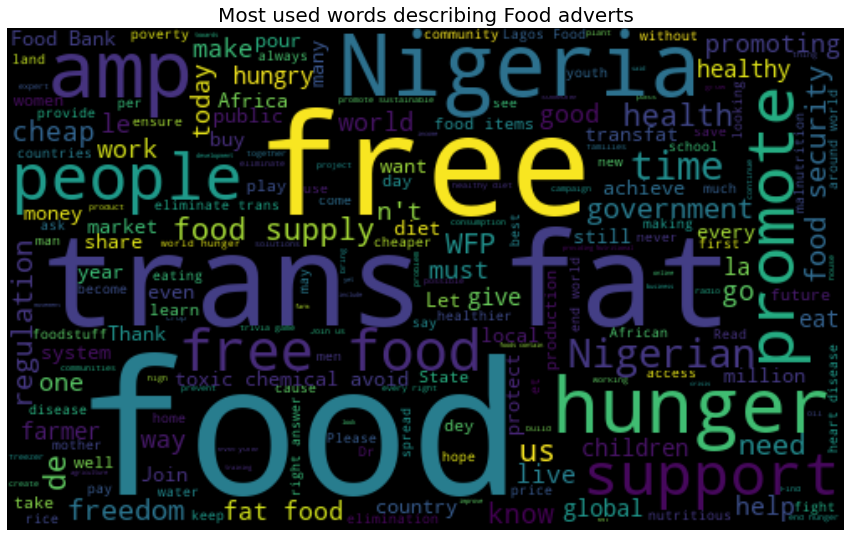

In [ ]:
Auto.Draw_Wordcloud(Adverts_Nigerian_Food_Tweets['clean_text'], 'Food adverts')

### **Nigerian Tweets about Food**

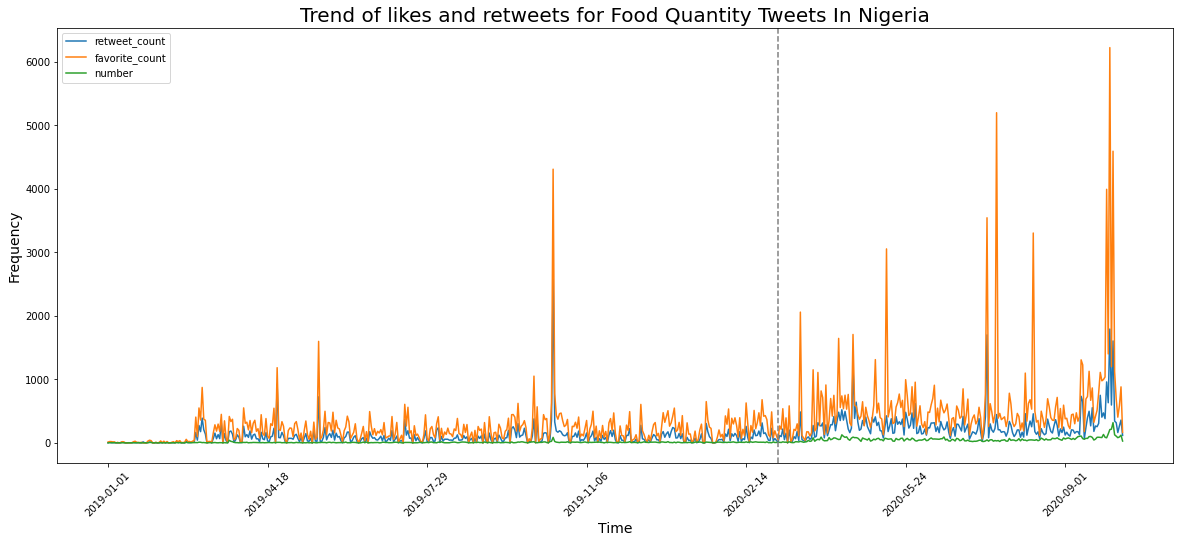

In [ ]:
Auto.Time_Trend(Nigerian_Food_Tweets, 'Food Quantity Tweets In Nigeria',420)

In [ ]:
Hashtags_Nigerian_Food_Tweets = Nigerian_Food_Tweets['hashtags']
Hashtag_List_Nigerian_Food_Tweets = []
for Hashtags in Hashtags_Nigerian_Food_Tweets:
    try:
        Hashtag = Hashtags.split(', ')
        Hashtag_List_Nigerian_Food_Tweets.extend(Hashtag)
    except AttributeError:
        continue

In [ ]:
#visualize Hashtag_List_Nigerian_Food_Tweets

In [ ]:
Mentions_Nigerian_Food_Tweets = Nigerian_Food_Tweets['user_mentions']
Mention_List_Nigerian_Food_Tweets = []
for Mentions in Mentions_Nigerian_Food_Tweets:
    try:
        Mention = Mentions.split(', ')
        Mention_List_Nigerian_Food_Tweets.extend(Mention)
    except AttributeError:
        continue

In [ ]:
#visualize Mention_List_Nigerian_Food_Tweets

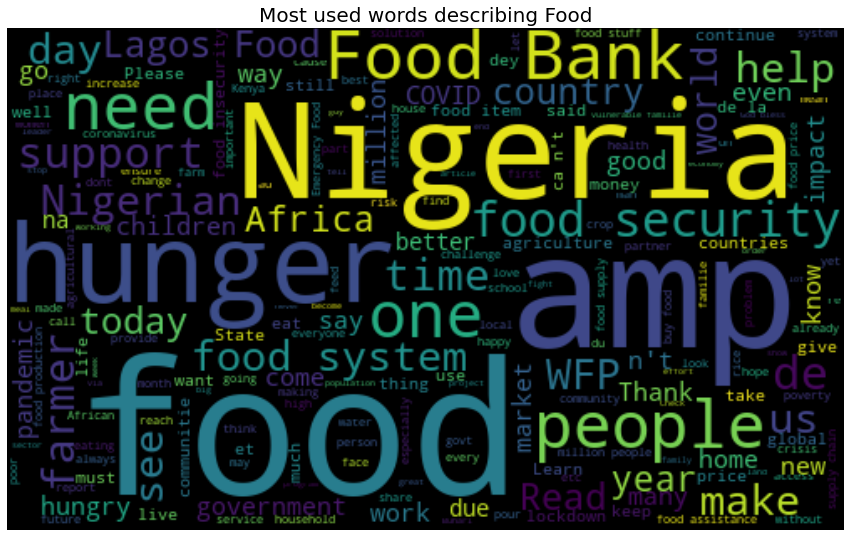

In [ ]:
Auto.Draw_Wordcloud(Nigerian_Food_Tweets['clean_text'], 'Food')

In [ ]:
# Filter Based on Food Keywords
Food_Keywords = ['food', 'foodstuffs', 'foodstuff', 'grocery','starvation', 'hungry', 'starving', 'hunger']

Nigerian_Food_Tweets = Nigerian_Tweets[Nigerian_Tweets['original_text'].str.lower().str.contains('|'.join(Food_Keywords))]
print(Nigerian_Food_Tweets.shape)

Advert_Keywords = ['promo', 'free', 'cheap','buy']
Adverts_Nigerian_Food_Tweets = Nigerian_Food_Tweets[Nigerian_Food_Tweets['original_text'].str.lower().str.contains('|'.join(Advert_Keywords))]
print(Adverts_Nigerian_Food_Tweets.shape)

Advertising_tweets = Adverts_Nigerian_Food_Tweets.index
Nigerian_Food_Tweets = Nigerian_Food_Tweets.drop(Advertising_tweets, axis=0)
print(Nigerian_Food_Tweets.shape)

(16156, 18)
(1046, 18)
(15110, 18)


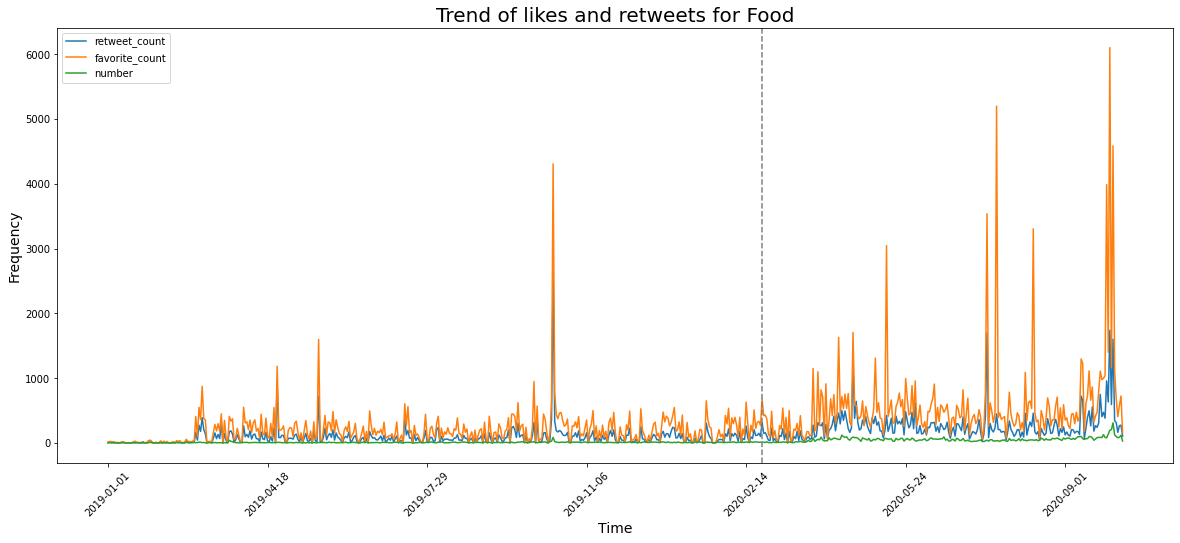

In [ ]:
Auto.Time_Trend(Nigerian_Food_Tweets, 'Food',410)

In [ ]:
Hashtags_Nigerian_Food_Tweets = Nigerian_Food_Tweets['hashtags']
Hashtag_List_Nigerian_Food_Tweets = []
for Hashtags in Hashtags_Nigerian_Food_Tweets:
    try:
        Hashtag = Hashtags.split(', ')
        Hashtag_List_Nigerian_Food_Tweets.extend(Hashtag)
    except AttributeError:
        continue

In [ ]:
#visualize Hashtag_List_Nigerian_Food_Tweets

In [ ]:
Mentions_Nigerian_Food_Tweets = Nigerian_Food_Tweets['user_mentions']
Mention_List_Nigerian_Food_Tweets = []
for Mentions in Mentions_Nigerian_Food_Tweets:
    try:
        Mention = Mentions.split(', ')
        Mention_List_Nigerian_Food_Tweets.extend(Mention)
    except AttributeError:
        continue

In [ ]:
#visualize Mention_List_Nigerian_Food_Tweets

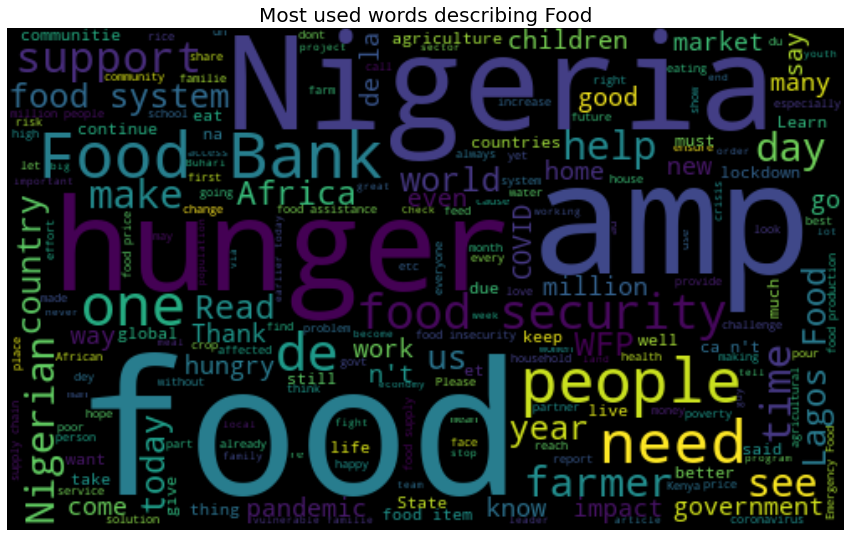

In [ ]:
Auto.Draw_Wordcloud(Nigerian_Food_Tweets['clean_text'], 'Food')

With COVID


In [ ]:
Covid_Keywords = ['covid', 'corona', 'pandemic','covid-19']
Covid_Nigerian_Food_Tweets = Nigerian_Food_Tweets[Nigerian_Food_Tweets['original_text'].str.lower().str.contains('|'.join(Covid_Keywords))]
print(Covid_Nigerian_Food_Tweets.shape)


(4430, 18)


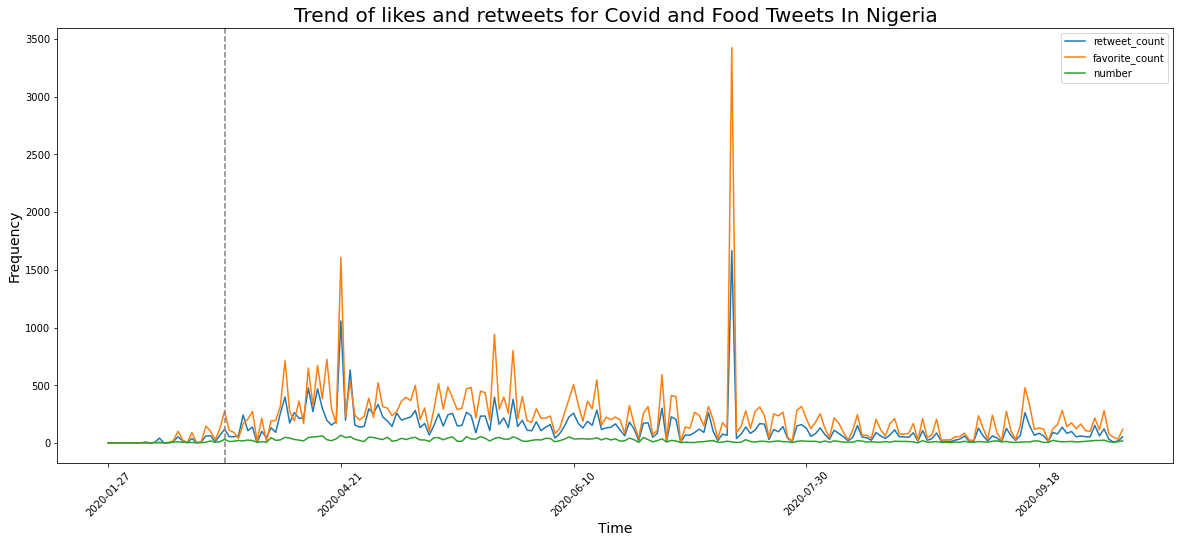

In [ ]:
Auto.Time_Trend(Covid_Nigerian_Food_Tweets, 'Covid and Food Tweets In Nigeria',25)

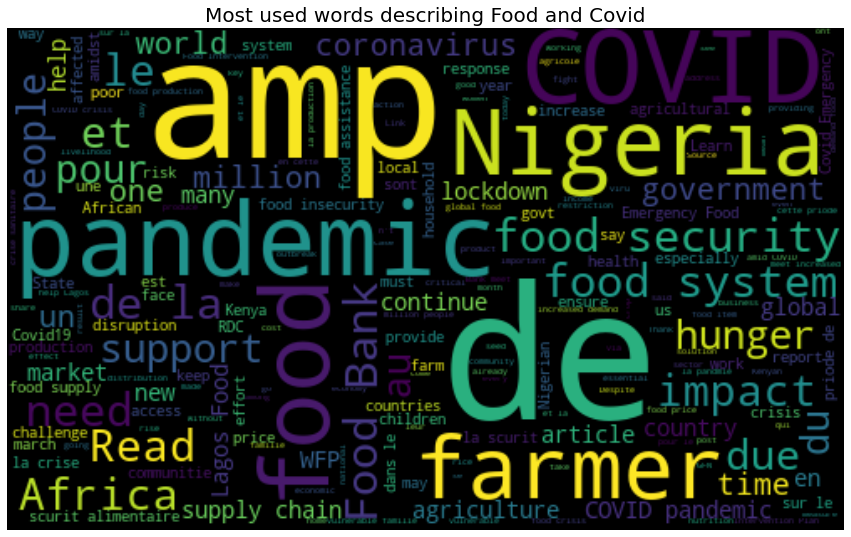

In [ ]:
Auto.Draw_Wordcloud(Covid_Nigerian_Food_Tweets['clean_text'], 'Food and Covid')

No COVID

In [ ]:
Covid_Tweets = Covid_Nigerian_Food_Tweets.index
No_Covid_Nigerian_Food_Tweets = Nigerian_Food_Tweets.drop(Covid_Tweets, axis=0)
print(No_Covid_Nigerian_Food_Tweets.shape)

(10680, 18)


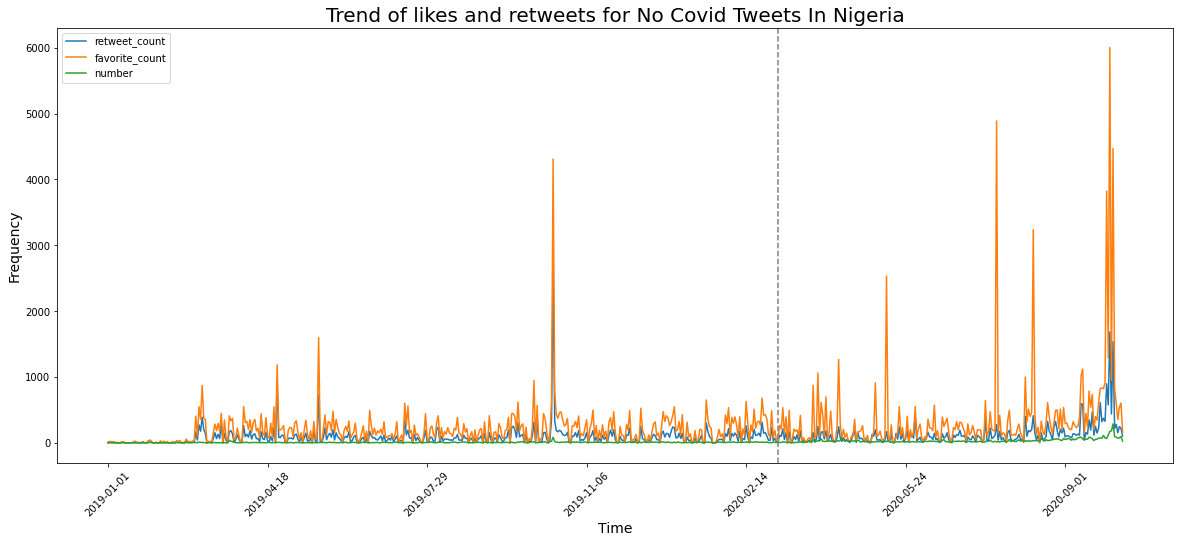

In [ ]:
Auto.Time_Trend(No_Covid_Nigerian_Food_Tweets, 'No Covid Tweets In Nigeria',420)

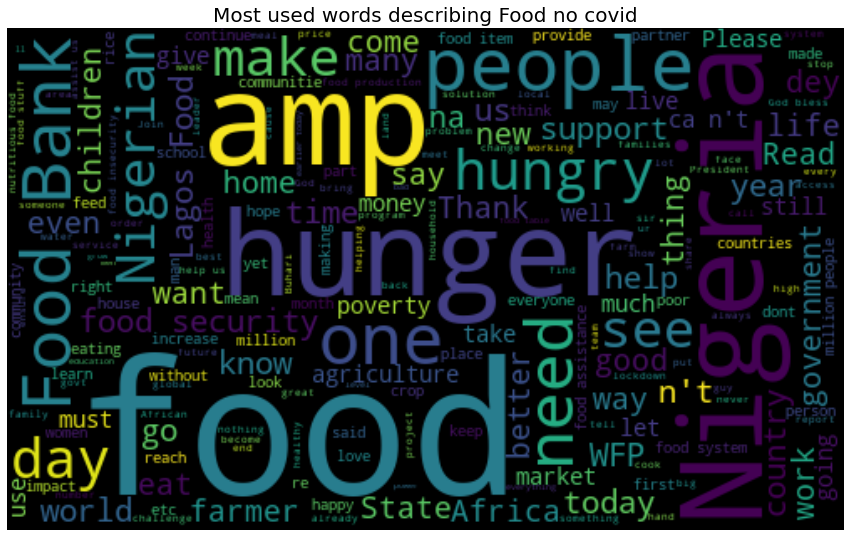

In [ ]:
Auto.Draw_Wordcloud(No_Covid_Nigerian_Food_Tweets['clean_text'], 'Food no covid')

## **South Africa**

In [ ]:
South_African_Tweets = Auto.Clean_Tweets(South_African_Tweets)
print(South_African_Tweets.shape)

(429924, 18)


In [ ]:
# Filter Based on Food Keywords
Food_Keywords = ['food', 'foodstuffs', 'foodstuff', 'grocery','starvation', 'hungry', 'starving', 'hunger']
South_African_Food_Tweets = South_African_Tweets[South_African_Tweets['original_text'].str.lower().str.contains('|'.join(Food_Keywords))]
print(South_African_Food_Tweets.shape)

#Remove Adverisements
Advert_Keywords = ['promo', 'free', 'cheap']
Adverts_South_African_Food_Tweets = South_African_Food_Tweets[South_African_Food_Tweets['original_text'].str.lower().str.contains('|'.join(Advert_Keywords))]
print(Adverts_South_African_Food_Tweets.shape)

Advertising_Tweets = Adverts_South_African_Food_Tweets.index
South_African_Food_Tweets = South_African_Food_Tweets.drop(Advertising_Tweets, axis=0)
print(South_African_Food_Tweets.shape)

(12439, 18)
(384, 18)
(12055, 18)


### **Advertisements**

In [ ]:
South_African_Adverts = list(Adverts_South_African_Food_Tweets['original_author'])

In [ ]:
#visualize this to bar chart South_African_Adverts

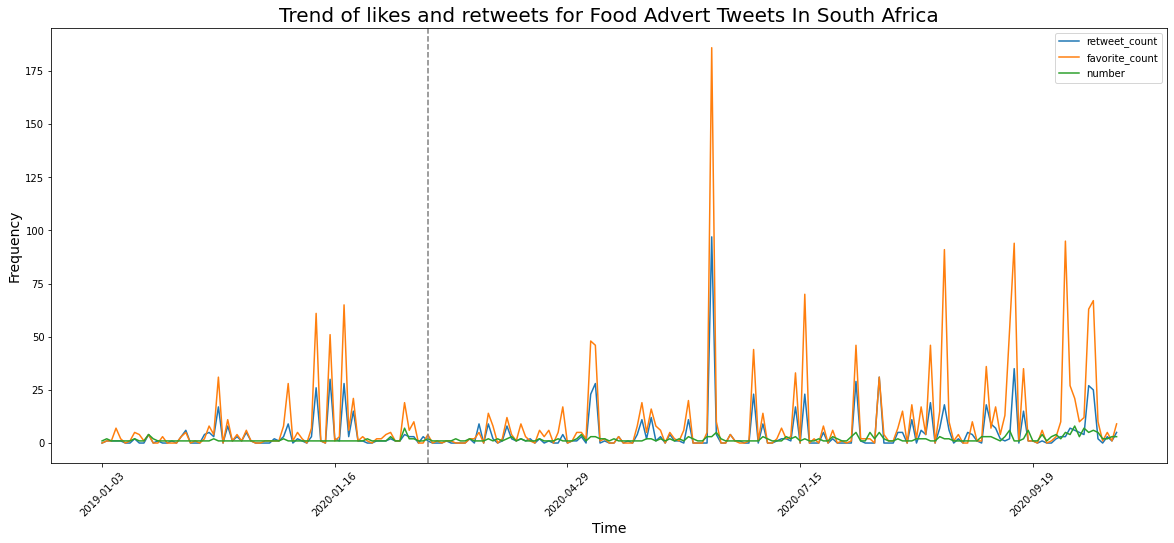

In [ ]:
Auto.Time_Trend(Adverts_South_African_Food_Tweets, 'Food Advert Tweets In South Africa',70)

In [ ]:
Hashtags_South_African_Food_Tweets = Adverts_South_African_Food_Tweets['hashtags']
Hashtag_List_South_African_Food_Tweets = []
for Hashtags in Hashtags_South_African_Food_Tweets:
    try:
        Hashtag = Hashtags.split(', ')
        Hashtag_List_South_African_Food_Tweets.extend(Hashtag)
    except AttributeError:
        continue

In [ ]:
#visualize Hashtag_List_South_African_Food_Tweets

In [ ]:
Mentions_South_African_Food_Tweets = Adverts_South_African_Food_Tweets['user_mentions']
Mention_List_South_African_Food_Tweets = []
for Mentions in Mentions_South_African_Food_Tweets:
    try:
        Mention = Mentions.split(', ')
        Mention_List_South_African_Food_Tweets.extend(Mention)
    except AttributeError:
        continue

In [ ]:
#visualize Mention_List_South_African_Food_Tweets

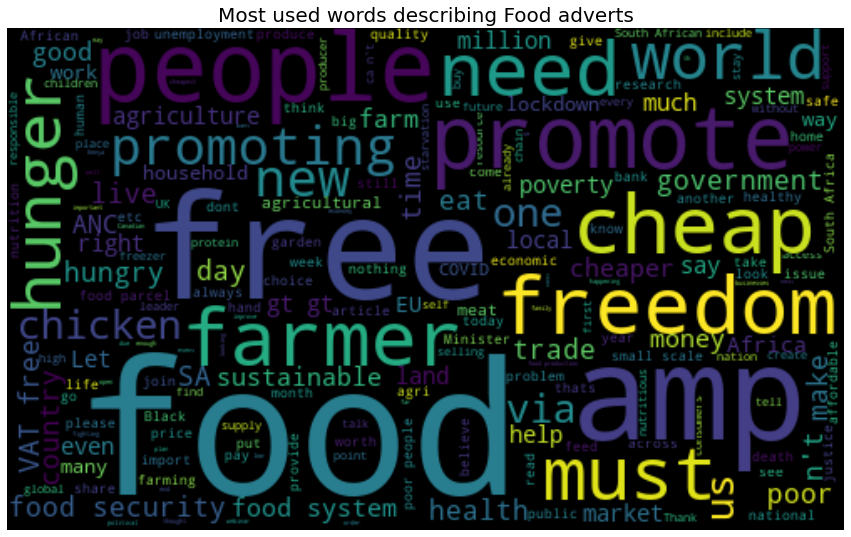

In [ ]:
Auto.Draw_Wordcloud(Adverts_South_African_Food_Tweets['clean_text'], 'Food adverts')

### **South African Tweets about Food**

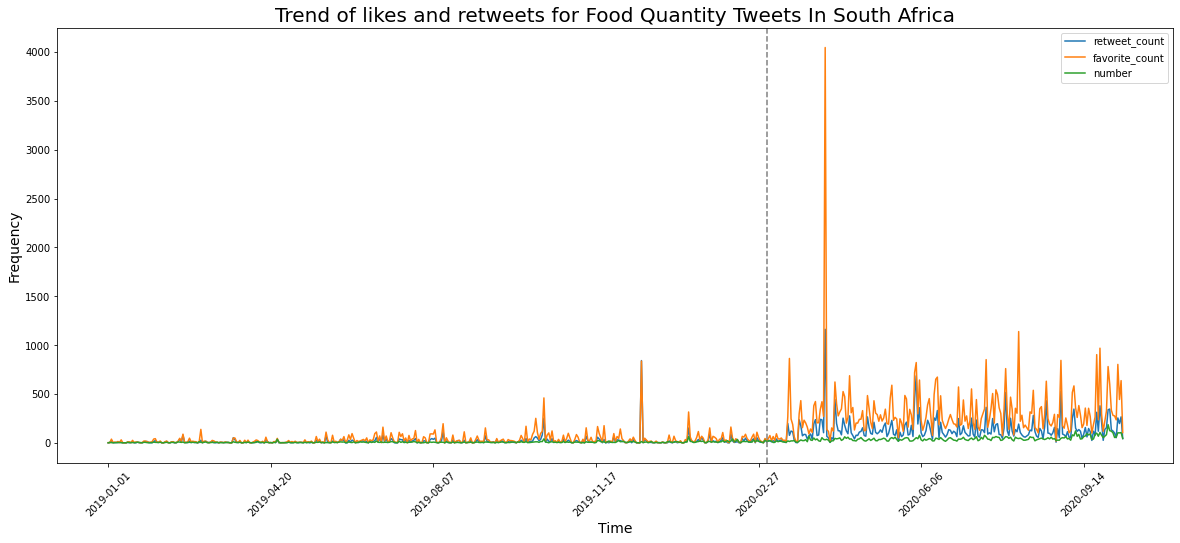

In [ ]:
Auto.Time_Trend(South_African_Food_Tweets, 'Food Quantity Tweets In South Africa',405)

In [ ]:
Hashtags_South_African_Food_Tweets = South_African_Food_Tweets['hashtags']
Hashtag_List_South_African_Food_Tweets = []
for Hashtags in Hashtags_South_African_Food_Tweets:
    try:
        Hashtag = Hashtags.split(', ')
        Hashtag_List_South_African_Food_Tweets.extend(Hashtag)
    except AttributeError:
        continue

In [ ]:
#visualize Hashtag_List_South_African_Food_Tweets

In [ ]:
Mentions_South_African_Food_Tweets = South_African_Food_Tweets['user_mentions']
Mention_List_South_African_Food_Tweets = []
for Mentions in Mentions_South_African_Food_Tweets:
    try:
        Mention = Mentions.split(', ')
        Mention_List_South_African_Food_Tweets.extend(Mention)
    except AttributeError:
        continue

In [ ]:
#visualize Mention_List_South_African_Food_Tweets

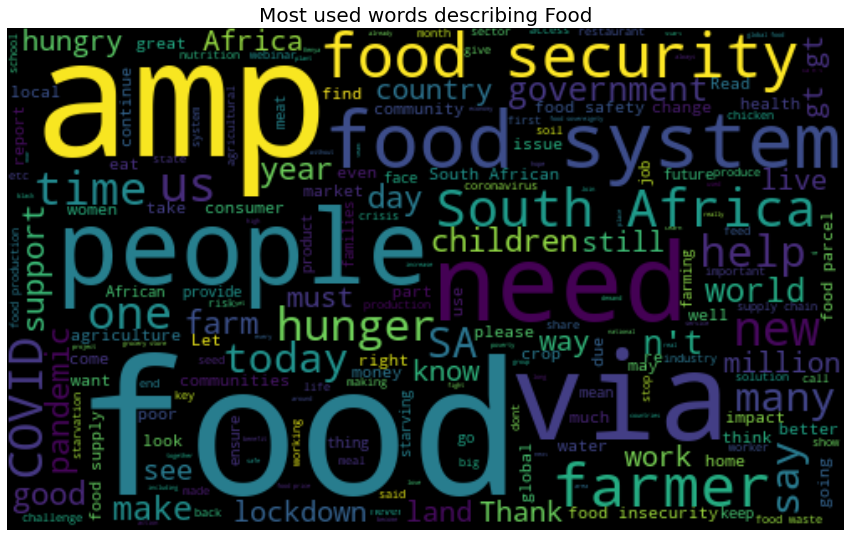

In [ ]:
Auto.Draw_Wordcloud(South_African_Food_Tweets['clean_text'], 'Food')

With COVID


In [ ]:
Covid_Keywords = ['covid', 'corona', 'pandemic','covid-19']
Covid_South_African_Food_Tweets = South_African_Food_Tweets[South_African_Food_Tweets['original_text'].str.lower().str.contains('|'.join(Covid_Keywords))]
print(Covid_South_African_Food_Tweets.shape)


(1963, 18)


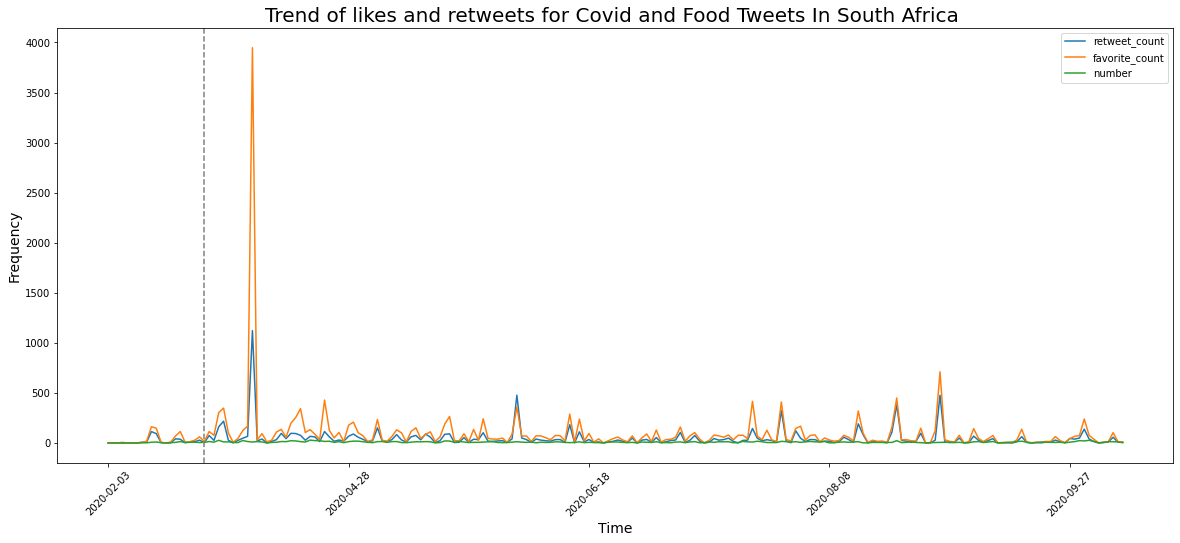

In [ ]:
Auto.Time_Trend(Covid_South_African_Food_Tweets, 'Covid and Food Tweets In South Africa ',20)

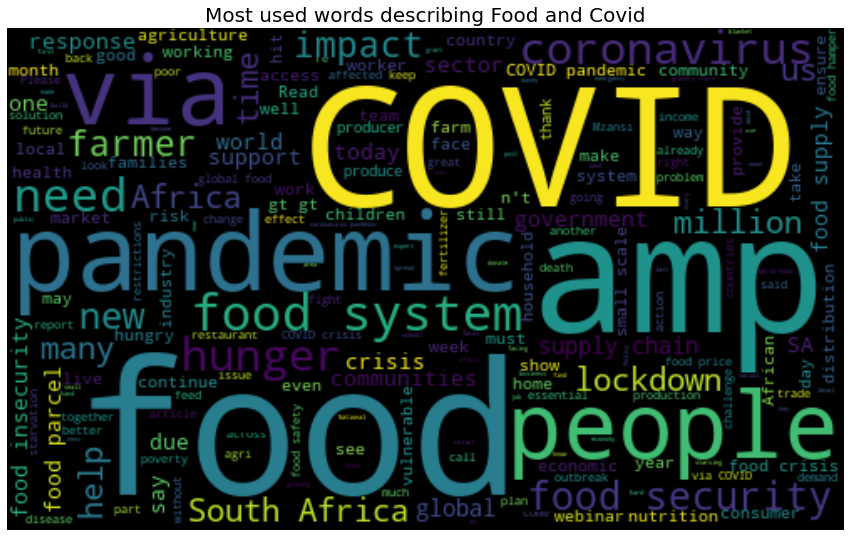

In [ ]:
Auto.Draw_Wordcloud(Covid_South_African_Food_Tweets['clean_text'], 'Food and Covid')

No COVID

In [ ]:
Covid_Tweets = Covid_South_African_Food_Tweets.index
No_Covid_South_African_Food_Tweets = South_African_Food_Tweets.drop(Covid_Tweets, axis=0)
print(No_Covid_South_African_Food_Tweets.shape)

(10092, 18)


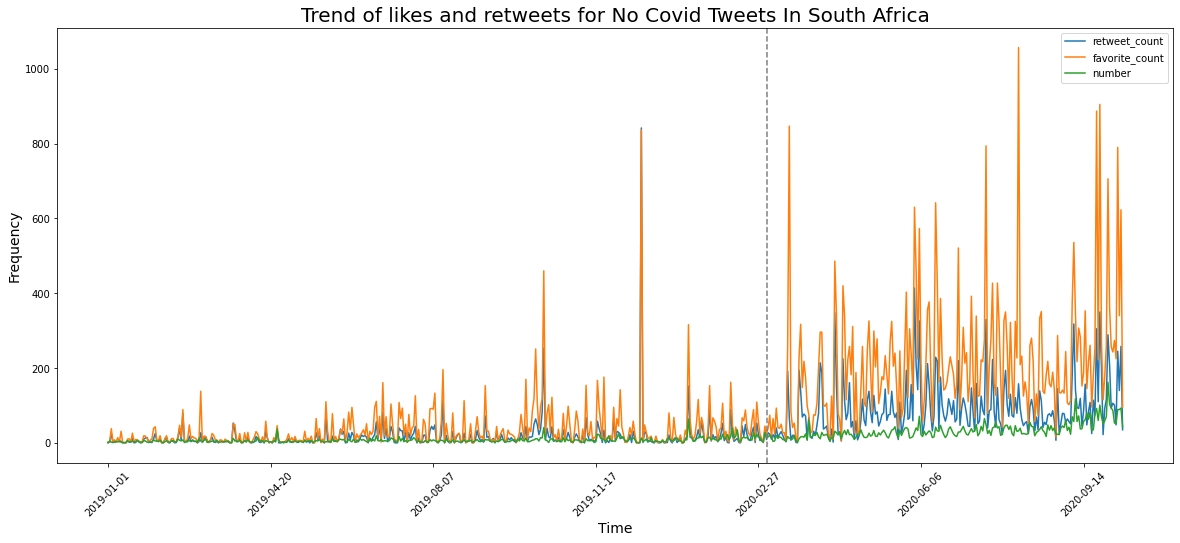

In [ ]:
Auto.Time_Trend(No_Covid_South_African_Food_Tweets, 'No Covid Tweets In South Africa',405)

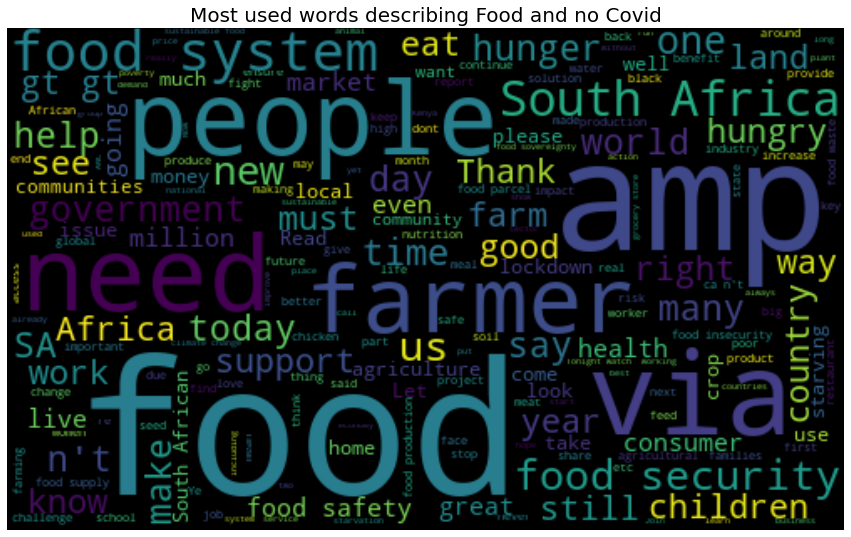

In [ ]:
Auto.Draw_Wordcloud(No_Covid_South_African_Food_Tweets['clean_text'], 'Food and no Covid')